In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
from backtest import preprocess

In [2]:
orderdf, acc = SingleDayHDAll('acc_sub.txt', '/Data/database/logs_thunder/20220321', 20220321) 

In [10]:
dfs = []
ticks = []
for dat in [20220117]:
    path = os.path.join('/Data/database/logs_thunder', str(dat))
    orderdf, acc = SingleDayHDAll('acc_sub.txt', path, dat) 
    path = '/Data/database/data_zltick/m'
    tick_data, contract = preprocess(path, str(dat)+'.csv')
    orderdf = orderdf[orderdf.ticker=='m']
    dfs.append(orderdf)
    ticks.append(tick_data)
    break
dfs = pd.concat(dfs)
ticks = pd.concat(ticks)
dfs['ticktime'] = dfs.ticktime.apply(lambda x:x+'00' if x.split('.')[1]=='0' else x)
ticks = ticks.reset_index()
ticks['ticktime'] = ticks.datetime.astype('str').apply(lambda x:x.split(' ')[1])

# a = orderdf[orderdf.ticker=='rb']
# a
# a = orderdf[orderdf.fx > 0]
# a = a[a.odprice == a.bidprice]
# a[(a.ticker=='rb') & (a.pss_cost>0)].iloc[0]
# a[a.filled_price > a.odprice]
# orderdf.iloc[100]



In [11]:
dfs

,acc_requestid,acc,reqid,ticktime,symbol,ticker,odtype,odprice,midprice,askprice,...,fx,filled_value,filled_lots,filled_time,filled_seconds,filled_date,pv,filled_price,agg_cost,pss_cost
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-16 21:00:03,71590066-22100026,71590066,22100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3200.0,1,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,2120115-42100026,2120115,42100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,6400.0,2,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,11801606-52100026,11801606,52100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3199.0,1,21:00:03\n,0.333,20220117,10.0,3199.0,10.0,10.0
2022-01-16 21:00:03,16606569-92100026,16606569,92100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3200.0,1,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,2120155-42100026,2120155,42100026,21:00:02.667,m2205,m,SellCloseY,3190.0,3199.5,3200.0,...,-1,3199.0,1,21:00:03\n,0.333,20220117,10.0,3199.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17 14:28:15,16606569-551428139,16606569,551428139,14:28:13.959,m2205,m,SellOpen,3160.0,3159.5,3160.0,...,-1,3160.0,1,14:28:16\n,2.041,20220117,10.0,3160.0,10.0,0.0
2022-01-17 14:32:44,YLAN158-171432430,YLAN158,171432430,14:32:43.7,m2205,m,SellOpen,3159.0,3158.5,3159.0,...,-1,3159.0,1,14:32:44\n,0.300,20220117,10.0,3159.0,10.0,0.0
2022-01-17 14:33:44,wkzq191021-171433430,wkzq191021,171433430,14:33:43.50,m2205,m,SellOpen,3159.0,3158.5,3159.0,...,-1,3159.0,1,14:33:45\n,1.500,20220117,10.0,3159.0,10.0,0.0


In [149]:
# dfs.reset_index().datetime.astype('str').apply(lambda x:x.split()[0]).unique()
# dfs.apply(lambda x:(ticks[ticks.ticktime==x['ticktime']].ticktime), axis=1)
# dfs.iloc[80]
for _, data in dfs.iterrows():
    tim = data['ticktime']
    ind = ticks[ticks.ticktime==tim].index[0]
    print(ticks.iloc[ind-2:ind+2])
    break

dfs.iloc[3]

                 datetime  bid  ask      bidv      askv     volume  \
3 2022-03-18 21:00:01.500  5.0  7.0 -0.604016 -0.717893  10.035536   
4 2022-03-18 21:00:02.000  1.0  5.0  6.960156  0.322361   6.201803   
5 2022-03-18 21:00:02.500  2.0  5.0 -0.723451  1.145249   7.074715   
6 2022-03-18 21:00:03.000  2.0  4.0 -0.691601 -0.593683   4.503165   

       ticktime  
3  21:00:01.500  
4  21:00:02.000  
5  21:00:02.500  
6  21:00:03.000  


acc_requestid     71590066-62100025
acc                        71590066
reqid                      62100025
ticktime               21:00:02.500
symbol                       rb2205
ticker                           rb
odtype                    BuyCloseY
odprice                      4935.0
midprice                     4926.5
askprice                     4928.0
bidprice                     4925.0
askvol                        242.0
bidvol                          1.0
lastprice                    4928.0
fx                                1
filled_value                 4925.0
filled_lots                       1
filled_time              21:00:02\n
filled_seconds                  0.0
filled_date                20220318
pv                             10.0
filled_price                 4925.0
agg_cost                       30.0
pss_cost                        0.0
Name: 2022-03-20 21:00:03, dtype: object

In [82]:
ticks.ticktime.notnull().sum()

0

In [54]:
pd.read_parquet()

TypeError: read_parquet() missing 1 required positional argument: 'path'

In [30]:
agent = pd.read_csv('res/rb.csv')
# oa = pd.read_csv('res/rb/DRLBuy.csv')
hd = {}
lv = {}
a = []
for i in [30, 50, 100, 200, 500, 600]:
    hd[i] = pd.read_csv(f'res/rb{i}hd.csv')
    a.append([f'hd{i}']+list(hd[i].mean()[1:4].values))
for i in [1, 2, 3, 5, 7, 10, 20]:
    lv[i] = pd.read_csv(f'res/rb{i}lv.csv')
    a.append([f'lv{i}']+list(lv[i].mean()[1:4].values))
a.append([f'DRL agent']+list(agent.mean()[1:4].values))

In [32]:
pd.DataFrame(a,columns = ['Algo', 'avgR', 'stdR', 'avgS']).to_csv('sim_res.csv', index=False)

In [15]:
hd[600].mean()[1:]

avgR      0.097610
stdR      3.892100
avgS     82.562452
stdS    165.944943
dtype: float64

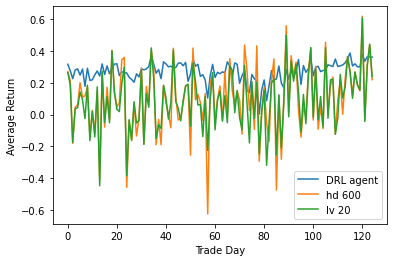

In [12]:
fig, ax = plt.subplots()
ax.plot(agent.avgR, label='DRL agent')
# ax.plot(oa.avgR, label='agent')

# ax.plot(hd[30].avgR, label='hd 30')
# ax.plot(hd[200].avgR, label='hd 200')
ax.plot(hd[600].avgR, label='hd 600')
# ax.plot(lv[2].avgR, label='lv 2')
# ax.plot(lv[10].avgR, label='lv 10')
ax.plot(lv[20].avgR, label='lv 20')
# ax.plot(data4.avgR, label='lv 10')
# ax.fill_between(data.avgR, data.avgR-data.stdR, data.avgR+data.stdR, alpha=0.1)
plt.xlabel('Trade Day')
plt.ylabel('Average Return')
plt.legend()
plt.show()

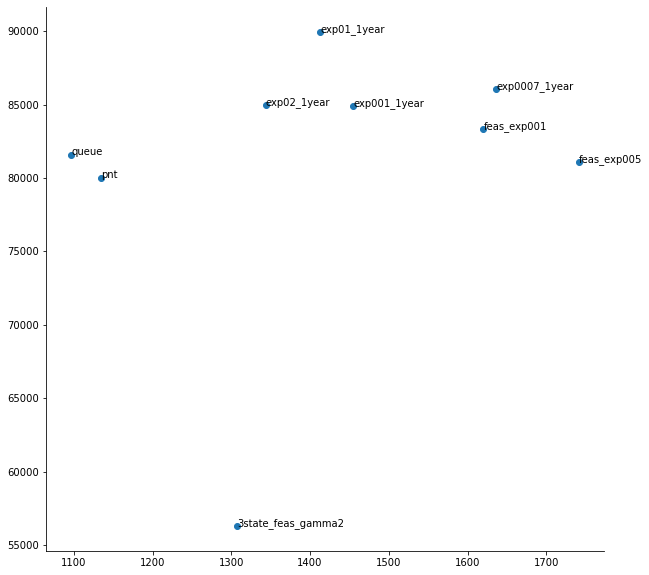

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
lams = ['01','1','2','5','10','50','100']
obj = 'i'
out = []
# for lam in lams:
#     name = '3state_gamma_'+lam
#     pth = os.path.join('res',name,obj,'sum.csv')
#     res = pd.read_csv(pth)
#     # res = res[res.date<20220322]
#     out.append([name, res.drl.sum(),res.avg_drl_sec.mean()])
oths = ['baseline','queue', 'feas_exp005', '3state_feas_gamma2', 'feas_exp001']
onames = ['pnt','queue', 'feas_exp005', '3state_feas_gamma2','feas_exp001']
for oth, onames in zip(oths, onames):
    pth = os.path.join('res',oth,obj,'sum.csv')
    res = pd.read_csv(pth)
    # res = res[res.date<20220322]
    out.append([onames, res.drl.sum(),res.drl.std()])
lams = ['01','001','02','0007']
for lam in lams:
    name = 'exp'+lam+'_1year'
    pth = os.path.join('res',name,obj,'sum.csv')
    res = pd.read_csv(pth)
    # res = res[res.date<20220322]
    out.append([name, res.drl.sum(),res.drl.std()])

out = pd.DataFrame(out, columns=['name','cost','stde'])
ax.scatter(out.stde, out.cost)
for a, b, c in zip(out.name, out.stde, out.cost):
    ax.annotate(a,xy=(b,c))


# avgr = [i.avgR.mean() for i in hd.values()]
# stdr = [i.stdR.mean() for i in hd.values()]
# ax.plot(stdr, avgr, 'o-', label='hd')
# for text, x, y in zip([30, 50, 100, 200, 500, 600], stdr, avgr):
#     ax.annotate(f'hd{text}', xy=(x,y), xytext=(x+0.1,y-0.01))
#     # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
# avgr = [i.avgR.mean() for i in lv.values()]
# stdr = [i.stdR.mean() for i in lv.values()]
# ax.plot(stdr, avgr, 'o-', label='lv')
# for text, x, y in zip([1, 2, 3, 5, 7, 10, 20], stdr, avgr):
#     ax.annotate(f'lv{text}', xy=(x,y), xytext=(x-0.1,y+0.01))
#     # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
# x = agent.stdR.mean()
# y = agent.avgR.mean()
# ax.scatter(x,y)
# ax.annotate(f'DRL agent', xy=(x,y), xytext=(x-0.1,y-0.02))
# plt.xlabel('stdR')
# plt.ylabel('avgR')
# plt.legend()
# # ax.plot(hd30.avgR)
# # ax.plot(hd30.stdR)

NameError: name 'hd' is not defined

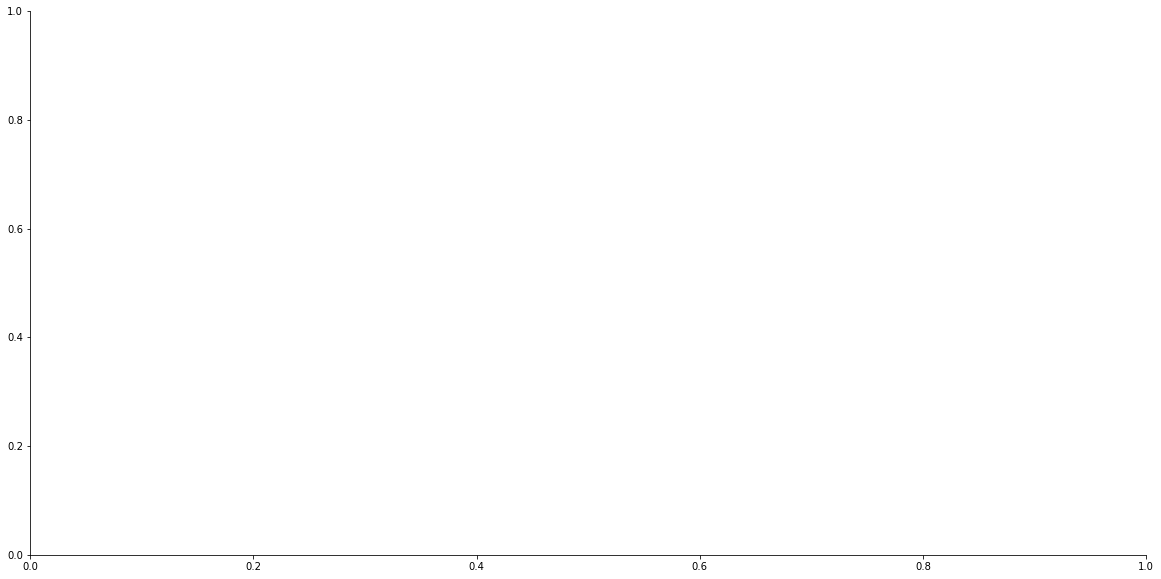

In [13]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
avgr = [i.avgR.mean() for i in hd.values()]
stdr = [i.stdR.mean() for i in hd.values()]
ax.plot(stdr, avgr, 'o-', label='hd')
for text, x, y in zip([30, 50, 100, 200, 500, 600], stdr, avgr):
    ax.annotate(f'hd{text}', xy=(x,y), xytext=(x+0.1,y-0.01))
    # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
avgr = [i.avgR.mean() for i in lv.values()]
stdr = [i.stdR.mean() for i in lv.values()]
ax.plot(stdr, avgr, 'o-', label='lv')
for text, x, y in zip([1, 2, 3, 5, 7, 10, 20], stdr, avgr):
    ax.annotate(f'lv{text}', xy=(x,y), xytext=(x-0.1,y+0.01))
    # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
x = agent.stdR.mean()
y = agent.avgR.mean()
ax.scatter(x,y)
ax.annotate(f'DRL agent', xy=(x,y), xytext=(x-0.1,y-0.02))
plt.xlabel('stdR')
plt.ylabel('avgR')
plt.legend()
# ax.plot(hd30.avgR)
# ax.plot(hd30.stdR)

In [97]:
agent.stdS.mean()v

16.084232957987275

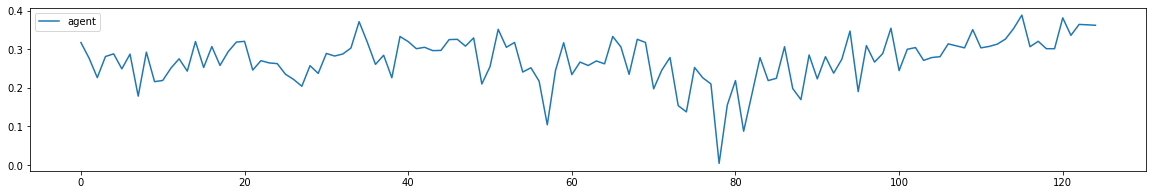

In [9]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(agent.avgR, label='agent')

plt.legend()
plt.show()

In [13]:
# np.corrcoef(agent.avgR, agent.stdR)
ag = pd.read_csv('ag.csv')
pp = pd.read_csv('pp.csv')
SA = pd.read_csv('SA.csv')
m = pd.read_csv('m.csv')


In [29]:
aghd = pd.read_csv('ag600hd.csv')
SAhd = pd.read_csv('SA600hd.csv')
pphd = pd.read_csv('pp600hd.csv')

<AxesSubplot:>

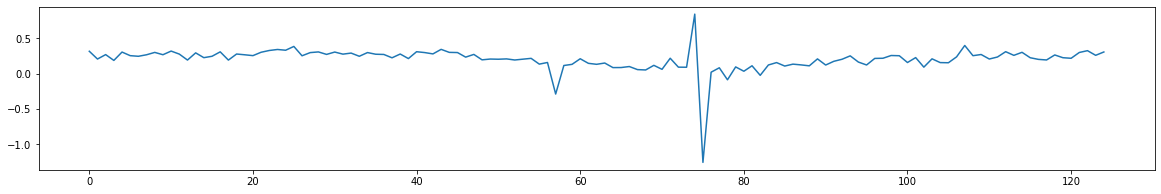

In [39]:
data = SA
# print(data.avgR.mean(), data.stdR.mean(), data.avgS.mean())
plt.figure(figsize=(20,3))
data.avgR.plot()
# aghd.avgR.plot()
# m.avgR.plot()
# pp.avgR.plot()
# SA.avgR.plot()


In [5]:
# data = pd.read_csv('symbol_instrumentid2.csv')
# objs = data.pz.unique()
objs = ['rb', 'bu', 'OI', 'i']
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    if os.path.exists(f'res/{obj}/trade/sum.csv'):
        fin.append(obj)
        data = pd.read_csv(f'res/{obj}/trade/sum.csv')
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]

In [6]:
a, b, c

(216025.0, 208890.0, 324700.0)

<BarContainer object of 55 artists>

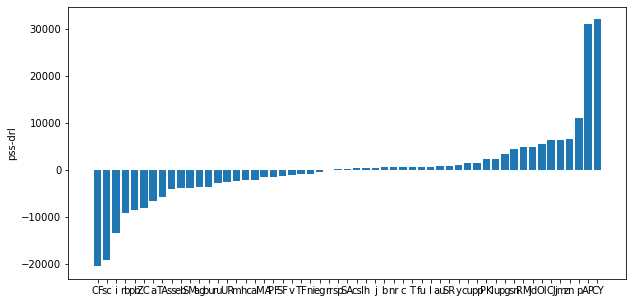

In [15]:
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(10,5))
plt.ylabel('pss-drl')
plt.bar(a, b)

In [ ]:
import shutil
dd = pd.read_csv('symbol_instrumentid2.csv')
objs = [i for i in dd.pz.unique()]
path = 'res/exp002_fea'
for obj in objs:
    cwd = os.path.join(path, obj, 'trade')
    cd = os.path.join(path,obj)
    for _, __, filens in os.walk(cwd):
        for filen in filens:
            shutil.move(os.path.join(cwd,filen),os.path.join(cd,filen))
    

SM           summ      stdd
summ  1.000000  0.128722
stdd  0.128722  1.000000


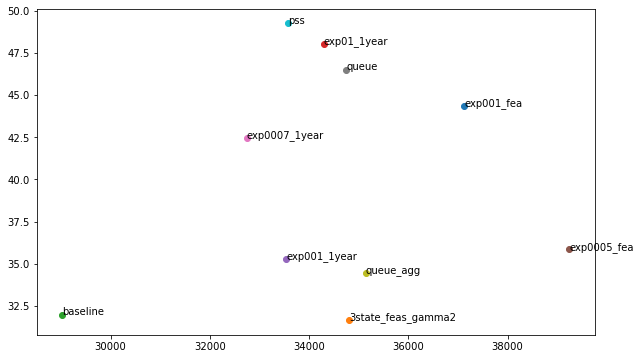

In [27]:
fig, ax=plt.subplots(figsize=(10,6))
# obj = 'OI'
# models = ['feas_exp01','feas_exp005','feas_exp001','exp01_1year', 'exp005_1year','exp001_1year', 'baseline', 'feas_gamma2', 'feas_gamma5']
models = ['exp001_fea','3state_feas_gamma2','baseline', 'exp01_1year','exp001_1year','exp0005_fea','exp0007_1year','queue','queue_agg']
dd = pd.read_csv('symbol_instrumentid2.csv')
# rest_objs = [i for i in dd.pz.unique() if i not in objs]
objs = ['SM']
# models = models+['3state_gamma_2','3state_gamma_5','3state_gamma_10','3state_gamma_50','queue']
# models = ['feas_exp01','exp01_1year']
for obj in objs:
    pth = os.path.join('res','exp0007_1year',obj)
    pss = []
    summary = []
    for _, __, files in os.walk(pth):
        for file in files:
            if file.split('.')[0]!='sum' and int(file.split('.')[0])<20220322:
                data = pd.read_csv(os.path.join(pth, file))
                # data = data[data.date<20220322]
                # print(data)
                pss.append(data.pss.values)
    for model in models:
        pth = os.path.join('res',model,obj)
        drls = []
        for _, __, files in os.walk(pth):
            for file in files:
                if file.split('.')[0]!='sum'and int(file.split('.')[0])<20220322:
                    data = pd.read_csv(os.path.join(pth, file))
                    # data = data[data.date<20220322]
                    drls.append(data.drl.values)
        # print(model, obj)
        drls = np.concatenate(drls)
        # print(model, drls.sum(), drls.std())
        summary.append([drls.sum(), drls.std()])
        ax.scatter(drls.sum(), drls.std())
        ax.annotate(model, xy=(drls.sum(), drls.std()))
        # ax.plot(np.sort(drls)[-2000:],label=model)
    pss = np.concatenate(pss)
    # print('pss', pss.sum(), pss.std())
    summary.append([pss.sum(),pss.std()])
    ax.scatter(pss.sum(), pss.std())
    ax.annotate('pss', xy=(pss.sum(), pss.std()))
    # ax.plot(np.sort(pss)[-2000:],label='pss')
    summary = pd.DataFrame(summary,columns=['summ','stdd'])
    # alls.append([obj, summary.corr().iloc[1,0]])
    if pss.sum() == summary.summ.min():
        continue
    print(obj, summary.corr())

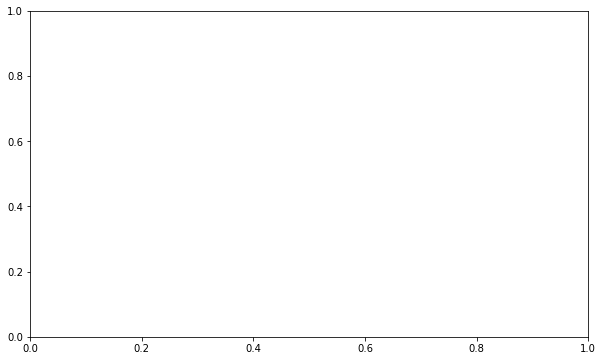

In [24]:
fig, ax=plt.subplots(figsize=(10,6))
# obj = 'OI'
# models = ['feas_exp01','feas_exp005','feas_exp001','exp01_1year', 'exp005_1year','exp001_1year', 'baseline', 'feas_gamma2', 'feas_gamma5']
models = ['3state_feas_gamma2','baseline','exp01_1year','exp001_1year','exp0005_fea','exp0007_1year','queue','queue_agg']
dd = pd.read_csv('symbol_instrumentid2.csv')
# rest_objs = [i for i in dd.pz.unique() if i not in objs]
objs = [i for i in dd.pz.unique()]
tmps = []
# objs = ['sc']
# models = models+['3state_gamma_2','3state_gamma_5','3state_gamma_10','3state_gamma_50','queue']
# models = ['feas_exp01','exp01_1year']
alls = []
for obj in objs:
    pth = os.path.join('res','exp0007_1year',obj)
    pss = []
    summary = []
    for _, __, files in os.walk(pth):
        for file in files:
            if file.split('.')[0]!='sum' and int(file.split('.')[0])<20220322:
                data = pd.read_csv(os.path.join(pth, file))
                # data = data[data.date<20220322]
                # print(data)
                pss.append(data.pss.values)
    for model in models:
        pth = os.path.join('res',model,obj)
        drls = []
        for _, __, files in os.walk(pth):
            for file in files:
                if file.split('.')[0]!='sum'and int(file.split('.')[0])<20220322:
                    data = pd.read_csv(os.path.join(pth, file))
                    # data = data[data.date<20220322]
                    drls.append(data.drl.values)
        # print(model, obj)
        drls = np.concatenate(drls)
        # print(model, drls.sum(), drls.std())
        summary.append([drls.sum(), drls.std()])
        # ax.scatter(drls.sum(), drls.std())
        # ax.annotate(model, xy=(drls.sum(), drls.std()))
        # ax.plot(np.sort(drls)[-2000:],label=model)
    pss = np.concatenate(pss)
    # print('pss', pss.sum(), pss.std())
    summary.append([pss.sum(),pss.std()])
    # ax.scatter(pss.sum(), pss.std())
    # ax.annotate('pss', xy=(pss.sum(), pss.std()))
    # ax.plot(np.sort(pss)[-2000:],label='pss')
    summary = pd.DataFrame(summary,columns=['summ','stdd'])
    alls.append([obj, summary.corr().iloc[1,0]])
    if pss.sum() == summary.summ.min():
        continue
    tmps.append(obj)
    # print(obj, summary.corr())

In [26]:
alls

[['al', -0.20447844586726585],
 ['zn', -0.37733833438313064],
 ['pb', 0.9479425395582819],
 ['ni', 0.6416715927220806],
 ['sn', 0.9081799259289856],
 ['y', -0.3466159590344275],
 ['b', -0.3692322431761281],
 ['pg', 0.6210423129768896],
 ['TA', -0.9666902738548431],
 ['CF', -0.08311726192343835],
 ['RM', 0.715681004824179],
 ['jd', 0.610880170873405],
 ['CJ', 0.8708940672540854],
 ['fu', -0.5081819791506421],
 ['sc', 0.09434196256583224],
 ['lu', 0.7850791576385943],
 ['a', -0.5806764150061585],
 ['j', 0.9224461175919156],
 ['CY', 0.7568433215639139],
 ['OI', 0.7498483188374662],
 ['ag', 0.6928977998873043],
 ['jm', 0.543487637166625],
 ['l', -0.877715597616199],
 ['pp', 0.9744955513984312],
 ['hc', 0.1938985582074624],
 ['v', -0.4903785298184605],
 ['SA', -0.5745783459540962],
 ['UR', 0.8480564768610133],
 ['ZC', 0.4384888029299547],
 ['cu', 0.23560493539161514],
 ['sp', 0.44044426656154734],
 ['SF', 0.5618515344591233],
 ['PF', 0.26450130951421147],
 ['lh', 0.234902811792657],
 ['PK',

In [29]:
[i[0] for i in sorted(alls, key=lambda x:x[1]) if i[0] in tmps and i[1]>0]

['SM',
 'au',
 'hc',
 'lh',
 'cu',
 'PF',
 'p',
 'ZC',
 'sp',
 'i',
 'jm',
 'SF',
 'jd',
 'pg',
 'ni',
 'ag',
 'RM',
 'OI',
 'CY',
 'lu',
 'UR',
 'CJ',
 'cs',
 'sn',
 'j',
 'pb',
 'AP',
 'pp']

In [26]:
import statsmodels.api as sm
x = sm.add_constant(summary.summ)
model = sm.OLS(summary.stdd, x).fit()
print(model.summary())
model.get_influence().cooks_distance

                            OLS Regression Results                            
Dep. Variable:                   stdd   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     5.341
Date:                Fri, 24 Jun 2022   Prob (F-statistic):             0.0496
Time:                        14:14:32   Log-Likelihood:                -25.231
No. Observations:                  10   AIC:                             54.46
Df Residuals:                       8   BIC:                             55.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.2941     15.604     -0.788      0.4

/home/hongyuan/miniconda3/envs/drl/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(array([1.67557803e-02, 1.18613810e-02, 4.52755300e-03, 4.50750302e-03,
        1.43690602e-01, 1.58741576e-01, 2.78665442e-05, 5.23632017e-03,
        7.38868452e-02, 6.45797566e-01]),
 array([0.98341823, 0.98822603, 0.99548523, 0.99550517, 0.86834175,
        0.85583931, 0.99997213, 0.99478077, 0.9294031 , 0.5495394 ]))

444860.0 417780.0 649400.0


4030.0

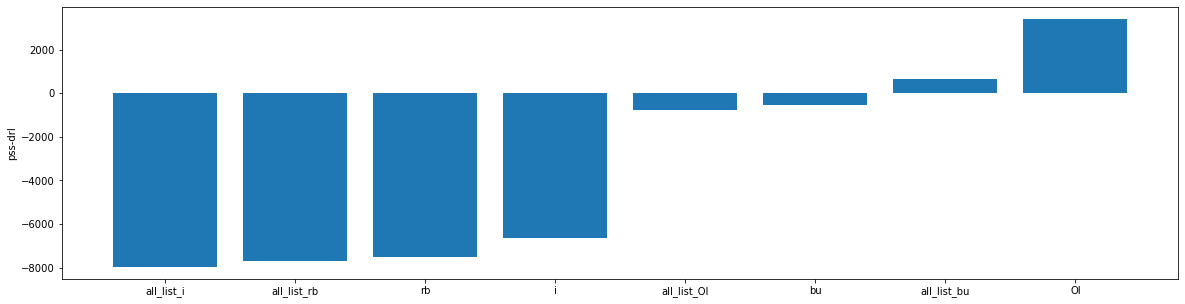

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
objs = ['rb', 'bu', 'OI', 'i']
# objs = ['rb','CF','nr','sc','al','UR','fu','MA','c','SR','y','TA','eg','v','SA','FG','ru','zn','eb','a','SF','T','au','PK','TF','l','bu']
dd = pd.read_csv('symbol_instrumentid2.csv')
# rest_objs = [i for i in dd.pz.unique() if i not in objs]
objs = objs+['all_list_'+i for i in objs]
# rest_objs = []
comment = 'exp001_fea'
# comment = 'queue'
cwd = os.path.join('res', comment)
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    file_path = os.path.join(cwd, obj, 'sum.csv')
    # file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
    if os.path.exists(file_path):
        fin.append(obj)
        data = pd.read_csv(file_path)
        data = data[data.date<20220322]
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
# for obj in rest_objs:
#     # file_path = os.path.join(cwd, obj, 'sum.csv')
#     file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
#     if os.path.exists(file_path):
#         fin.append(obj)
#         data = pd.read_csv(file_path)
#         a+=data.drl.sum()
#         b+=data.pss.sum()
#         c+=data['agg'].sum()
#         cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]
print(a,b,c)
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(20,5))
plt.ylabel('pss-drl')
plt.bar(a, b)
sum([i for i in b if i > 0])

In [52]:
sorted(alls, key=lambda x:x[1])

[['TA', -0.9666902738548431],
 ['l', -0.877715597616199],
 ['SR', -0.8540201964699877],
 ['eg', -0.7923075222719861],
 ['rb', -0.703202550767512],
 ['MA', -0.6732163988384929],
 ['a', -0.5806764150061585],
 ['SA', -0.5745783459540962],
 ['fu', -0.5081819791506421],
 ['v', -0.4903785298184605],
 ['PK', -0.45602677595741314],
 ['FG', -0.44305040430631293],
 ['T', -0.42434716224488606],
 ['zn', -0.37733833438313064],
 ['b', -0.3692322431761281],
 ['y', -0.3466159590344275],
 ['eb', -0.31609488708101885],
 ['bu', -0.29411323026968245],
 ['c', -0.26545478011691837],
 ['nr', -0.2606109497565186],
 ['al', -0.20447844586726585],
 ['rr', -0.14009104627811772],
 ['CF', -0.08311726192343835],
 ['m', -0.04923921353151385],
 ['ss', -0.01572709945125866],
 ['TF', -0.005528187822065744],
 ['ru', -0.0017955773946820533],
 ['SM', 0.05403128444315422],
 ['au', 0.056492322472391984],
 ['sc', 0.09434196256583224],
 ['hc', 0.1938985582074624],
 ['lh', 0.234902811792657],
 ['cu', 0.23560493539161514],
 ['PF

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
objs = ['rb', 'bu', 'OI', 'i']
objs = ['rb','CF','nr','sc','al','UR','fu','MA','c','SR','y','TA','eg','v','SA','FG','ru','zn','eb','a','SF','T','au','PK','TF','l','bu']
dd = pd.read_csv('symbol_instrumentid2.csv')
rest_objs = [i for i in dd.pz.unique() if i not in objs]
objs = [i for i in dd.pz.unique()]
best_para = []
# rest_objs = []
for obj in objs:
    ma = 1e9
    for comment in ['baseline', 'exp0007_1year', 'exp001_1year', 'exp01_1year', 'queue', 'queue_agg']:
        a = 0
        b = 0
        cwd = os.path.join('res', comment)
        file_path = os.path.join(cwd, obj, 'sum.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            # data = data[data.date<20220201]
            a+=data.drl.sum()
            b+=data.pss.sum()
        if a < ma:
            ma = a
            ct = comment
        best_para.append((obj,comment,a))
    best_para.append((obj,'pss',b))


In [29]:
best_para = pd.DataFrame(best_para,columns=['obj','cmt','cost'])
best_para[best_para.obj=='sc']
tmp = best_para.groupby('obj').cost.min()
pd.merge(best_para, tmp, on=['obj','cost']).to_csv('test.csv')

1555215.0354003909 1627420.0 1814184.9999999993


<BarContainer object of 28 artists>

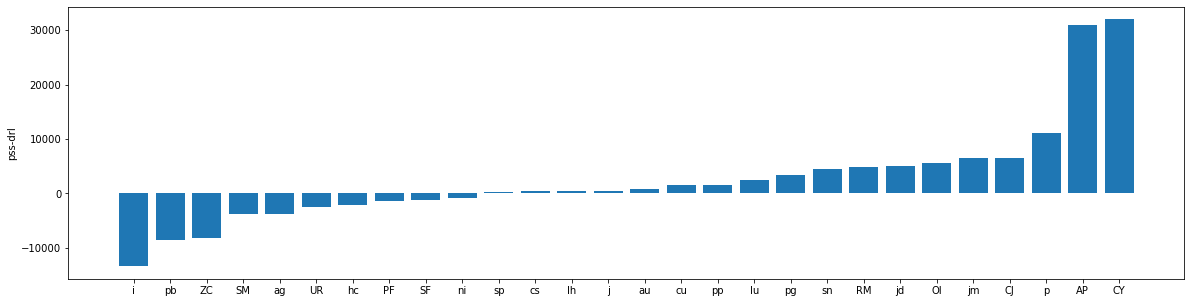

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
objs = ['rb', 'bu', 'OI', 'i']
objs = ['rb','CF','nr','sc','al','UR','fu','MA','c','SR','y','TA','eg','v','SA','FG','ru','zn','eb','a','SF','T','au','PK','TF','l','bu']
dd = pd.read_csv('symbol_instrumentid2.csv')
rest_objs = [i for i in dd.pz.unique() if i not in objs]
objs = [i for i in dd.pz.unique()]
obj_list = ['SM',
 'au',
 'hc',
 'lh',
 'cu',
 'PF',
 'p',
 'ZC',
 'sp',
 'i',
 'jm',
 'SF',
 'jd',
 'pg',
 'ni',
 'ag',
 'RM',
 'OI',
 'CY',
 'lu',
 'UR',
 'CJ',
 'cs',
 'sn',
 'j',
 'pb',
 'AP',
 'pp']
objs = obj_list
# rest_objs = []
# comment = 'queue'
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    comment = 'exp001_fea'
    cwd = os.path.join('res', comment)
    file_path = os.path.join(cwd, obj, 'sum.csv')
    # file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
    if os.path.exists(file_path):
        fin.append(obj)
        data = pd.read_csv(file_path)
        # data = data[data.date>20220321]
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
# for obj in rest_objs:
#     # file_path = os.path.join(cwd, obj, 'sum.csv')
#     file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
#     if os.path.exists(file_path):
#         fin.append(obj)
#         data = pd.read_csv(file_path)
#         a+=data.drl.sum()
#         b+=data.pss.sum()
#         c+=data['agg'].sum()
#         cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]
print(a,b,c)
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(20,5))
plt.ylabel('pss-drl')
plt.bar(a, b)

In [37]:
# data = data.set_index(data.date.astype('str'))
obj = 'rb'
data = pd.read_csv(f'res/3state_gamma_50/{obj}/sum.csv')
print(data.drl.sum(), data.avg_drl_sec.mean(), data['agg'].sum())
data = pd.read_csv(f'res/3state_gamma_10/{obj}/sum.csv')
print(data.drl.sum(), data.avg_drl_sec.mean(), data['agg'].sum())
data = pd.read_csv(f'res/3state_gamma_5/{obj}/sum.csv')
print(data.drl.sum(), data.avg_drl_sec.mean(), data['agg'].sum())

66545.0 22.901053301921603 105350.0
60825.0 19.495195726280105 105350.0
57895.0 18.82996337876237 105350.0


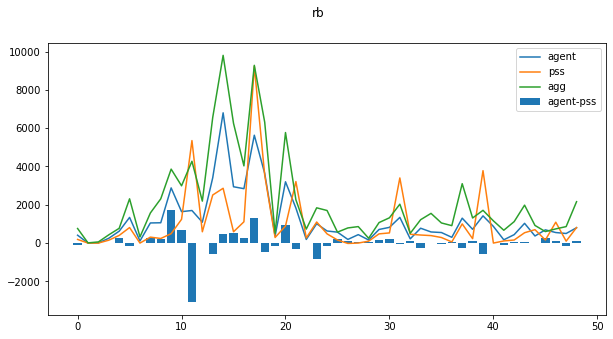

In [41]:
obj = 'rb'
data = pd.read_csv(f'res/{obj}/trade/sum.csv')
data1 = pd.read_csv(f'res/exp005/{obj}/sum.csv')
fig, ax,= plt.subplots(figsize=(10,5))
ax.plot(data.index, data.drl, label='agent')
ax.plot(data.index,data.pss, label='pss')
ax.plot(data.index,data['agg'], label='agg')
ax.bar(data.index, data.drl-data.pss-(data1.drl-data1.pss), label='agent-pss')
# ax2 = ax.twinx()
# ax.bar(data1.index, data1.drl-data1.pss, label='agent-psss')
# ax2 = ax.twinx()
# ax2.plot(data.index,data.avg_drl_sec, label='avg_drl_sec')
# ax2.plot(data.index,data.avg_pss_sec, label='avg_drl_sec')
plt.suptitle(obj)
# ax2 = fig.add_subplot(2,1,2)
plt.legend()

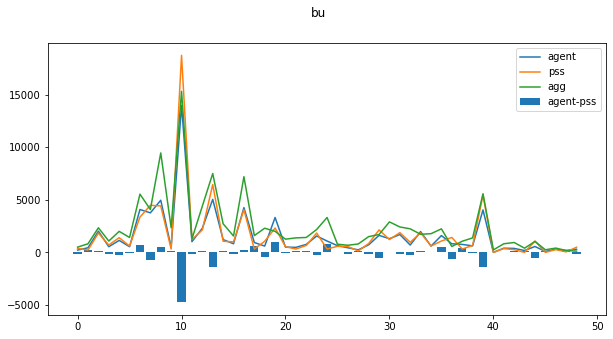

In [9]:
obj = 'bu'
# data = pd.read_csv(f'res/{obj}/trade/sum.csv')
data = pd.read_csv(f'res/exp005/{obj}/sum.csv')
fig, ax,= plt.subplots(figsize=(10,5))
ax.plot(data.index, data.drl, label='agent')
ax.plot(data.index,data.pss, label='pss')
ax.plot(data.index,data['agg'], label='agg')
ax.bar(data.index, data.drl-data.pss, label='agent-pss')
# ax2 = ax.twinx()
# ax2.plot(data.index,data.avg_drl_sec, label='avg_drl_sec')
# ax2.plot(data.index,data.avg_pss_sec, label='avg_drl_sec')
plt.suptitle(obj)
# ax2 = fig.add_subplot(2,1,2)
plt.legend()

2755978.312036693 2759387.4999999995 3557060.0


<BarContainer object of 55 artists>

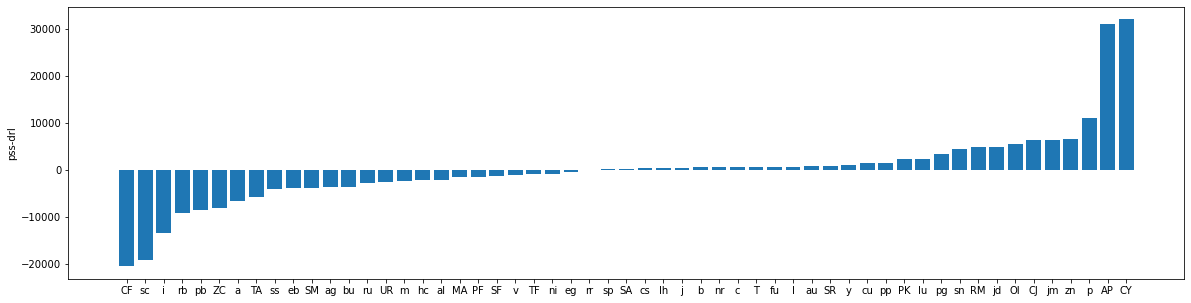

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
objs = ['rb', 'bu', 'OI', 'i']
# objs = ['rb','CF','nr','sc','al','UR','fu','MA','c','SR','y','TA','eg','v','SA','FG','ru','zn','eb','a','SF','T','au','PK','TF','l','bu']
dd = pd.read_csv('symbol_instrumentid2.csv')
# rest_objs = [i for i in dd.pz.unique() if i not in objs]
# objs = objs+['all_list_'+i for i in objs]
# objs = obj_list
objs = dd.pz.unique()
# rest_objs = []
comment = 'exp001_fea'
# comment = 'queue'
cwd = os.path.join('res', comment)
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    file_path = os.path.join(cwd, obj, 'sum.csv')
    # file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
    if os.path.exists(file_path):
        fin.append(obj)
        data = pd.read_csv(file_path)
        # data = data[data.date<20220322]
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
# for obj in rest_objs:
#     # file_path = os.path.join(cwd, obj, 'sum.csv')
#     file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
#     if os.path.exists(file_path):
#         fin.append(obj)
#         data = pd.read_csv(file_path)
#         a+=data.drl.sum()
#         b+=data.pss.sum()
#         c+=data['agg'].sum()
#         cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]
print(a,b,c)
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(20,5))
plt.ylabel('pss-drl')
plt.bar(a, b)